In [12]:
import requests

data = {"input_data": "...}"}
response = requests.post('http://localhost:5000/match', json=data)
r = response.json()
print(r['kpts1'])

[[365.07042253521126, 67.5], [392.11267605633805, 40.5], [2420.281690140845, 67.5], [392.11267605633805, 94.5], [419.15492957746477, 94.5], [1203.380281690141, 67.5], [2501.4084507042253, 101.25], [2230.9859154929577, 135.0], [2149.8591549295775, 202.5], [1041.1267605633802, 229.5], [2149.8591549295775, 310.5], [2176.9014084507044, 310.5], [2339.154929577465, 310.5], [338.0281690140845, 337.5], [371.83098591549293, 310.5], [1419.718309859155, 310.5], [1906.4788732394366, 337.5], [2339.154929577465, 310.5], [2149.8591549295775, 391.5], [960.0, 391.5], [1176.338028169014, 391.5], [1257.4647887323943, 418.5], [1270.9859154929577, 411.75], [1419.718309859155, 418.5], [1500.8450704225352, 405.0], [1554.9295774647887, 405.0], [1609.0140845070423, 418.5], [1609.0140845070423, 411.75], [1906.4788732394366, 418.5], [1960.5633802816901, 398.25], [2149.8591549295775, 398.25], [2230.9859154929577, 398.25], [878.8732394366197, 445.5], [987.0422535211268, 445.5], [1041.1267605633802, 438.75], [1257.

In [20]:
import os

# 原图片的路径
img_path = '/home/hechunjiang/gradio/data/img-orgin/1.jpg'

# 获取当前工作目录
current_directory = os.getcwd()

# 从图片路径中提取相对路径部分（去掉根路径部分）
relative_path = os.path.relpath(img_path, current_directory)

# 提取文件名（不带扩展名）
filename_without_ext = os.path.splitext(os.path.basename(img_path))[0]

# 构建结果保存路径
result_directory = os.path.join(current_directory, os.path.dirname(relative_path), filename_without_ext)

# 检查目录是否存在，如果不存在则创建
# if not os.path.exists(result_directory):
#     os.makedirs(result_directory)

result_directory, filename_without_ext, relative_path, current_directory

('/home/hechunjiang/gradio/src/data/img-orgin/1',
 '1',
 'data/img-orgin/1.jpg',
 '/home/hechunjiang/gradio/src')

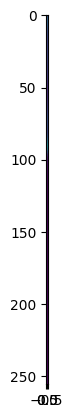

In [6]:
# Color Histogram
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图片
img = cv2.imread(filename='/home/hechunjiang/gradio/data/img-orgin/1.jpg')

# 将图片从 BGR 空间转换到 HSV 空间
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 计算直方图
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# 显示直方图
plt.imshow(hist, interpolation='nearest')
plt.show()

In [12]:
# 灰度共生矩阵
import cv2
from skimage.feature import graycomatrix, graycoprops

# 读取图片
img = cv2.imread(filename='/home/hechunjiang/gradio/data/img-orgin/1.jpg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 计算灰度共生矩阵
glcm = graycomatrix(gray_img, [1], [0], symmetric=True, normed=True)


In [20]:
glcm.shape

(256, 256, 1, 1)

In [16]:
contrast = graycoprops(glcm, prop='contrast')
dissimilarity = graycoprops(glcm, prop='dissimilarity')
homogeneity = graycoprops(glcm, prop='homogeneity')
energy = graycoprops(glcm, prop='energy')
correlation = graycoprops(glcm, prop='correlation')

In [17]:
contrast, dissimilarity, homogeneity, energy, correlation

(array([[28.70885334]]),
 array([[3.7688475]]),
 array([[0.27730119]]),
 array([[0.03438183]]),
 array([[0.97885973]]))

In [18]:
import cv2
#利用拉普拉斯
def getImageResolution(imgPath):
    image = cv2.imread(imgPath)
    img2gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imageVar = cv2.Laplacian(img2gray, cv2.CV_64F).var()
    return imageVar
imageVar = getImageResolution("/home/hechunjiang/gradio/data/img-TV/1-TV.jpg")
print(imageVar)

26.169351400860037


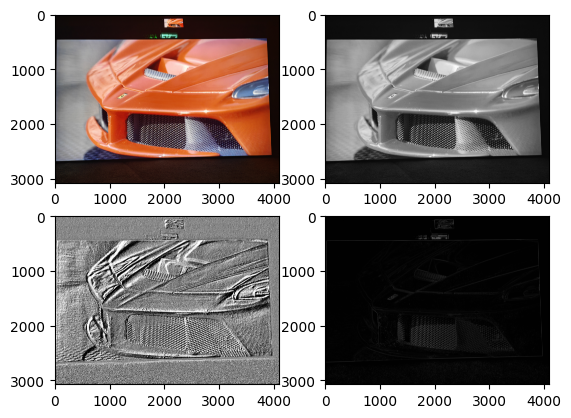

In [22]:
from skimage.feature import local_binary_pattern
from skimage import data, filters
import matplotlib.pyplot as plt
import cv2

# settings for LBP
radius = 3  # LBP算法中范围半径的取值
n_points = 8 * radius  # 领域像素点数


# 读取图像
image = cv2.imread('/home/hechunjiang/gradio/data/img-TV/1-TV.jpg')

#显示到plt中，需要从BGR转化到RGB，若是cv2.imshow(win_name, image)，则不需要转化
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(221)   # 把画布分成2*2的格子，放在第一格
plt.imshow(image1)

# 转换为灰度图显示
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(222)  # 把画布分成2*2的格子,放在第2格
plt.imshow(image, cmap='gray')

# LBP特征
lbp = local_binary_pattern(image, n_points, radius)
plt.subplot(223)  # 把画布分成2*2的格子,放在第3格
plt.imshow(lbp, cmap='gray')

# 边缘特征-sobel算子
edges = filters.sobel(image)
plt.subplot(224)  # 把画布分成2*2的格子,放在第4格
plt.imshow(edges, cmap='gray')
plt.show()


array([[1.5728641e+07, 1.5728641e+07, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.4680071e+07, 1.4680067e+07, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 2.9286400e+05],
       [1.2582927e+07, 1.3369375e+07, 0.0000000e+00, ..., 1.2492800e+06,
        5.2838400e+05, 4.0857600e+05],
       ...,
       [8.3886110e+06, 0.0000000e+00, 0.0000000e+00, ..., 3.1808000e+04,
        2.4576000e+04, 2.9440000e+04],
       [1.5000000e+01, 1.2600000e+02, 0.0000000e+00, ..., 1.2288000e+04,
        4.0960000e+03, 0.0000000e+00],
       [8.0000000e+00, 2.5300000e+02, 5.0500000e+02, ..., 7.7920000e+03,
        7.3920000e+03, 0.0000000e+00]])

In [25]:
# getLightness
import cv2
import numpy as np
img = cv2.imread('/home/hechunjiang/gradio/data/img-TV/1-TV.jpg')
# 把图片转换为单通道的灰度图
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 获取形状以及长宽
img_shape = gray_img.shape
height, width = img_shape[0], img_shape[1]
size = gray_img.size
# 灰度图的直方图
hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
# 计算灰度图像素点偏离均值(128)程序
a = 0
ma = 0
# np.full 构造一个数组，用指定值填充其元素
reduce_matrix = np.full((height, width), 128)
shift_value = gray_img - reduce_matrix
shift_sum = np.sum(shift_value)
da = shift_sum / size
# 计算偏离128的平均偏差
for i in range(256):
    ma += (abs(i-128-da) * hist[i])
m = abs(ma / size)
# 亮度系数
k = abs(da) / m
print(k)
if k[0] > 1:
    # 过亮
    if da > 0:
        print("过亮")
    else:
        print("过暗")
else:
    print("亮度正常")

[0.5489148]
亮度正常


In [1]:
import cv2
cv2.xfeatures2d.SIFT_create()

[ WARN:0@0.017] global shadow_sift.hpp:13 SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


< cv2.SIFT 0x7fad392fc7f0>

In [9]:
import yaml


class ConfigManager:
    def __init__(self, config_file=None):
        self.config_file = config_file
        self.config = None

        if config_file:
            self.load_config(config_file)

    def load_config(self, config_file):
        with open(config_file, 'r') as file:
            self.config = yaml.safe_load(file)

    def get(self, section):
        return self.config.get(section)

    def set(self, section, key, value):
        if section not in self.config:
            self.config[section] = {}
        self.config[section][key] = value

    def save(self, config_file=None):
        with open(config_file, 'w') as file:
            yaml.dump(self.config, file, default_flow_style=False)


# 使用示例
config_manager = ConfigManager(
    config_file='/home/hechunjiang/gradio/src/configs/config.yaml')
GeoFormer = config_manager.get('GeoFormer')
print(f"GeoFormer: {GeoFormer}")

config_manager.set('GeoFormer', 'image_size', 22)
print(f"GeoFormer: {GeoFormer}")
config_manager.save("/home/hechunjiang/gradio/src/configs/config_bak.yaml")

GeoFormer: {'image_size': 224, 'threshold': 0.5}
GeoFormer: {'image_size': 22, 'threshold': 0.5}


In [16]:
import requests
data = {"model": "GeoFormer"}
r = requests.post('http://localhost:5003/config/get_config', json=data)
print(r.json())

{'image_size': 224, 'threshold': 0.5}


In [1]:
import requests
data = {"model": "GeoFormer"}
r = requests.post('http://localhost:5003/config/save_config', json=data)
print(r.json())

{'model': 'GeoFormer'}


In [6]:
from watchdog.observers import Observer
from watchdog.events import FileSystemEventHandler
import time


class ConfigReloadHandler(FileSystemEventHandler):
    def __init__(self, config_path, callback):
        self.config_path = config_path
        self.callback = callback

    def on_modified(self, event):
        if event.src_path == self.config_path:
            print("Config file has been modified, reloading...")
            self.callback()


def load_config():
    # 模拟加载配置文件
    print("Config loaded from file.")


def start_reloader(config_path):
    event_handler = ConfigReloadHandler(config_path, load_config)
    observer = Observer()
    observer.schedule(event_handler, path=config_path, recursive=False)
    observer.start()
    try:
        while True:
            time.sleep(1)
    except KeyboardInterrupt:
        observer.stop()
    observer.join()


if __name__ == "__main__":
    config_path = '/home/hechunjiang/gradio/src/configs/config_bak.yaml'
    start_reloader(config_path)

In [ ]:
import pandas as pd

all_scores = {
    "LG": pd.DataFrame(),
    "SONY": pd.DataFrame(),
    "AMAZON": pd.DataFrame()
}

file_path = ["/home/hechunjiang/gradio/Siamese-pytorch/final_output_tanh-vgg16/final_output.csv",
             "/home/hechunjiang/gradio/Siamese-pytorch/final_output_tanh-resnet50/final_output.csv",
             "/home/hechunjiang/gradio/Siamese-pytorch/final_output_tanh-vit/final_output.csv"]


def init_data():
    # file_path里面的数据是分别是三个模型的输出结果
    # 每个文件里面是三个样品的输出结果
    # 现在要把着些数据读出来，按照样品进行分组，存入all_scores中
    for path in file_path:
        data = pd.read_csv(path)
        for head in data.columns:
            all_scores[head] = pd.concat([all_scores[head], data[head]], axis=1)
    for key in all_scores.keys():
        all_scores[key].columns = ['vgg', 'resnet', 'vit']
    return all_scores

init_data()

{'LG':            LG         LG         LG
 0   48.310001  47.400002  50.380001
 1   48.520000  44.610001  48.740002
 2   44.410000  42.160000  43.639999
 3   45.259998  40.500000  43.759998
 4   48.279999  46.630001  51.590000
 5   49.060001  47.540001  50.730000
 6   40.090000  34.790001  38.090000
 7   41.009998  40.529999  42.910000
 8   43.610001  35.849998  38.630001
 9   49.750000  51.209999  47.369999
 10  46.000000  46.180000  46.290001
 11  44.959999  43.790001  46.270000
 12  34.639999  32.599998  35.669998
 13  37.810001  36.730000  40.470001
 14  37.509998  35.810001  38.230000
 15  41.660000  36.740002  37.820000
 16  44.709999  40.779999  44.580002
 17  44.500000  42.349998  48.709999
 18  48.779999  42.349998  51.110001
 19  47.290001  43.820000  46.939999
 20  44.700001  40.889999  45.270000,
 'SONY':          SONY       SONY       SONY
 0   49.410000  50.599998  54.009998
 1   48.389999  46.099998  51.590000
 2   44.619999  45.130001  43.820000
 3   45.779999  37.5999

In [2]:
all_scores['LG']

[array([48.31000137, 48.52000046, 44.40999985, 45.25999832, 48.27999878,
        49.06000137, 40.09000015, 41.00999832, 43.61000061, 49.75      ,
        46.        , 44.95999908, 34.63999939, 37.81000137, 37.50999832,
        41.65999985, 44.70999908, 44.5       , 48.77999878, 47.29000092,
        44.70000076]),
 array([47.40000153, 44.61000061, 42.15999985, 40.5       , 46.63000107,
        47.54000092, 34.79000092, 40.52999878, 35.84999847, 51.20999908,
        46.18000031, 43.79000092, 32.59999847, 36.72999954, 35.81000137,
        36.74000168, 40.77999878, 42.34999847, 42.34999847, 43.81999969,
        40.88999939]),
 array([50.38000107, 48.74000168, 43.63999939, 43.75999832, 51.59000015,
        50.72999954, 38.09000015, 42.90999985, 38.63000107, 47.36999893,
        46.29000092, 46.27000046, 35.66999817, 40.47000122, 38.22999954,
        37.81999969, 44.58000183, 48.70999908, 51.11000061, 46.93999863,
        45.27000046])]

In [3]:
data = pd.read_csv(file_path[0])

In [ ]:
data['LG']

array([48.31000137, 48.52000046, 44.40999985, 45.25999832, 48.27999878,
       49.06000137, 40.09000015, 41.00999832, 43.61000061, 49.75      ,
       46.        , 44.95999908, 34.63999939, 37.81000137, 37.50999832,
       41.65999985, 44.70999908, 44.5       , 48.77999878, 47.29000092,
       44.70000076])